In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

print('Loading Complete!')

Instructions for updating:
Use the retry module or similar alternatives.
Loading Complete!


In [2]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
#Input Layer
X_data = tf.placeholder(tf.float32, [None, 784])
X = tf.reshape(X_data, [-1, 28, 28, 1]) # 28 by 28 mnist images.

#Output Layer
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
W1 = tf.get_variable("W1", shape=[3, 3, 1, 32],
                     initializer=tf.contrib.layers.variance_scaling_initializer())

#W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # filter 32개
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
L_flat = tf.reshape(L1, [-1, 14 * 14 * 32])

In [7]:
#W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 10], stddev=0.01))
W3 = tf.get_variable("W3", shape=[14 * 14 * 32, 10],
                     initializer=tf.contrib.layers.xavier_initializer())

b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L_flat, W3) + b

In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X_data: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.258068191
Epoch: 0002 cost = 0.089581201
Epoch: 0003 cost = 0.065265030
Epoch: 0004 cost = 0.053735524
Epoch: 0005 cost = 0.044849938
Epoch: 0006 cost = 0.039465734
Epoch: 0007 cost = 0.034439379
Epoch: 0008 cost = 0.029857554
Epoch: 0009 cost = 0.026703657
Epoch: 0010 cost = 0.024636142
Epoch: 0011 cost = 0.020975172
Epoch: 0012 cost = 0.018241586
Epoch: 0013 cost = 0.016221014
Epoch: 0014 cost = 0.014363540
Epoch: 0015 cost = 0.012764508
Learning Finished!


In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X_data: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X_data: mnist.test.images[r:r + 1]}))

Accuracy: 0.9825
Label:  [5]
Prediction:  [5]


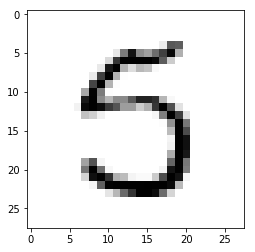

In [12]:
plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()